TypeError: Portfolio.statistics() missing 1 required positional argument: 'weights'

<Axes: >

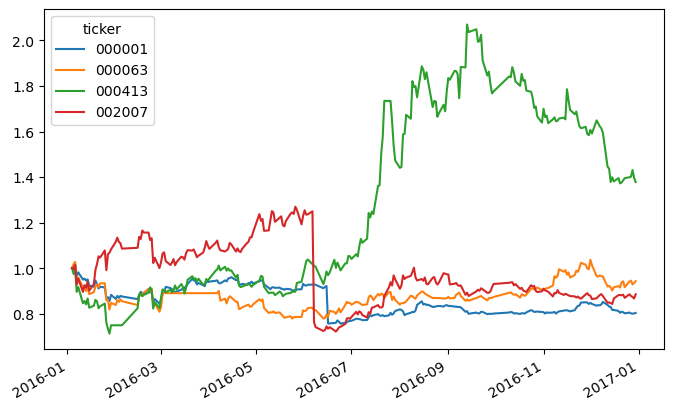

In [37]:
import numpy as np

closes = p.get_close_price()
(closes/closes.iloc[0]).plot(figsize=(8, 5))

In [32]:
returns = np.log(closes / closes.shift(1))

returns.mean()*252

ticker
000001   -0.300497
000063   -0.020940
000413    0.175008
002007    0.298651
dtype: float64

In [95]:
np.dot(returns.cov()*252, weights).shape

(4,)

In [102]:
weights = np.random.random(size=(10, 4))

In [104]:
np.dot(weights, np.dot(returns.cov()*252, weights.T))

array([[1.2614442 , 0.8179625 , 1.09339679, 1.11605393, 0.94181795,
        1.01659558, 0.89354889, 1.14688542, 1.24962085, 0.96402384],
       [0.8179625 , 0.60326377, 0.71426469, 0.78284319, 0.65777136,
        0.7314392 , 0.60071995, 0.76129965, 0.83341047, 0.62013458],
       [1.09339679, 0.71426469, 1.08000944, 0.98800049, 0.79624071,
        0.90758733, 0.86578873, 1.04435787, 1.16900073, 0.95104535],
       [1.11605393, 0.78284319, 0.98800049, 1.0383396 , 0.86143759,
        0.96346773, 0.8172508 , 1.02849511, 1.13627343, 0.85580347],
       [0.94181795, 0.65777136, 0.79624071, 0.86143759, 0.79619903,
        0.77920766, 0.67913847, 0.91290882, 0.92075866, 0.75683471],
       [1.01659558, 0.7314392 , 0.90758733, 0.96346773, 0.77920766,
        0.90311108, 0.75013636, 0.92866007, 1.04823062, 0.76693202],
       [0.89354889, 0.60071995, 0.86578873, 0.8172508 , 0.67913847,
        0.75013636, 0.70370177, 0.86402727, 0.94624856, 0.77504761],
       [1.14688542, 0.76129965, 1.0443578

In [105]:
np.dot(weights.T, np.dot(returns.cov()*252, weights))

ValueError: shapes (4,4) and (10,4) not aligned: 4 (dim 1) != 10 (dim 0)

In [106]:
np.dot(returns.cov()*252, weights)

ValueError: shapes (4,4) and (10,4) not aligned: 4 (dim 1) != 10 (dim 0)

In [21]:
def statistics(weights):

    weights = np.array(weights)

    port_returns = np.sum(returns.mean()*weights)*252

    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))

    return np.array([port_returns, port_variance, port_returns/port_variance])

In [18]:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

In [22]:
bnds = tuple((0,1) for x in range(noa))
opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.5217185282285154
       x: [ 0.000e+00  2.993e-17  5.940e-03  9.941e-01]
     nit: 6
     jac: [ 6.575e-01  3.570e-01  5.670e-05 -3.353e-07]
    nfev: 30
    njev: 6

In [64]:
weights_random = np.random.random(size=(1000, 4))
weights_random = np.divide(weights_random, np.sum(weights_random, axis = 1)[:, np.newaxis])
weights_random

array([[0.3337674 , 0.29643165, 0.09015372, 0.27964723],
       [0.3861854 , 0.06009654, 0.14369602, 0.41002204],
       [0.12977041, 0.29141447, 0.34621316, 0.23260197],
       ...,
       [0.28982065, 0.27712838, 0.1344025 , 0.29864848],
       [0.12033631, 0.47366758, 0.14859551, 0.2574006 ],
       [0.29803985, 0.42443666, 0.18905965, 0.08846384]])

In [78]:
returns.mean().values

array([-1.19244845e-03, -8.30945345e-05,  6.94475626e-04,  1.18512407e-03])

In [84]:
val = returns.mean().values * 252 * weights_random

In [85]:
val[0].sum()

-0.007208722322760111

In [114]:
np.sum(returns.mean().values * 252 * weights_random, axis = 1)

array([-7.20872232e-03,  3.02955648e-02,  8.49591067e-02,  1.55495755e-01,
       -1.16361001e-02,  1.13958644e-02,  6.50604047e-02,  2.02353937e-02,
        1.04620560e-01,  1.43040578e-01, -5.58233736e-03, -1.22746784e-01,
        1.76565687e-01,  3.35677825e-02, -1.75940876e-03,  1.38466153e-01,
        9.32545864e-02,  2.39716414e-02,  8.32355189e-02,  7.93732140e-02,
       -1.61386435e-03,  1.55677169e-01, -5.74388602e-03, -3.32983557e-02,
       -8.11253392e-03, -1.16242550e-01,  1.24949786e-01, -2.32051000e-03,
       -5.84212350e-02, -1.96989852e-02,  9.01844475e-02,  1.22449298e-01,
        8.84563823e-02,  3.74881236e-02,  9.29141285e-03,  1.43177402e-01,
       -4.23211039e-02,  1.91340776e-02,  3.22501866e-02,  9.07204604e-03,
        3.45090345e-02,  7.32734843e-02,  1.43533377e-01, -3.19994103e-02,
       -1.26007011e-02, -1.56628299e-01,  2.29500518e-02,  1.07826964e-01,
        3.23031550e-02,  8.64758988e-02,  2.14490930e-02, -3.55313999e-02,
        1.22194801e-01,  

In [112]:
np.sqrt(np.diag(returns.cov().values * 252))

array([0.48857845, 0.61674609, 0.64761686, 0.57244673])

array([[0.1920146 , 0.17975303, 0.19634249, ..., 0.19239641, 0.20689267,
        0.19701739],
       [0.17975303, 0.17961754, 0.18671111, ..., 0.18175403, 0.18796754,
        0.17785355],
       [0.19634249, 0.18671111, 0.22578372, ..., 0.20157706, 0.22315741,
        0.20824032],
       ...,
       [0.19239641, 0.18175403, 0.20157706, ..., 0.19390165, 0.20931811,
        0.19753395],
       [0.20689267, 0.18796754, 0.22315741, ..., 0.20931811, 0.23554113,
        0.21742923],
       [0.19701739, 0.17785355, 0.20824032, ..., 0.19753395, 0.21742923,
        0.21167718]])

In [109]:
weights_random.T

array([[0.3337674 , 0.3861854 , 0.12977041, ..., 0.28982065, 0.12033631,
        0.29803985],
       [0.29643165, 0.06009654, 0.29141447, ..., 0.27712838, 0.47366758,
        0.42443666],
       [0.09015372, 0.14369602, 0.34621316, ..., 0.1344025 , 0.14859551,
        0.18905965],
       [0.27964723, 0.41002204, 0.23260197, ..., 0.29864848, 0.2574006 ,
        0.08846384]])

In [107]:
(np.dot(returns.cov().values * 252, weights_random.T))

array([[0.15426487, 0.1481869 , 0.12534123, ..., 0.14673326, 0.13282509,
        0.15809341],
       [0.23479368, 0.18902409, 0.24352659, ..., 0.23345862, 0.27806918,
        0.25921193],
       [0.18031955, 0.18666716, 0.25838526, ..., 0.19456352, 0.21471519,
        0.20689327],
       [0.19549364, 0.20537166, 0.21106698, ..., 0.20267136, 0.2173242 ,
        0.17436306]])

In [61]:
np.sum(weights_random, axis = 1)

array([0.84144645, 2.73451376, 2.15934962, 2.43846766, 2.15620825,
       0.97408641, 1.44115496, 1.66332396, 2.21319941, 1.89589824,
       1.56351419, 1.97088216, 2.99609518, 2.96945853, 1.07821986,
       2.24473971, 3.03375651, 1.85259018, 2.42086654, 1.54167721,
       1.45576047, 2.72360102, 2.86810628, 2.29737035, 2.96092055,
       1.09133955, 3.01565931, 2.80387309, 2.18850073, 1.31887668,
       1.36950925, 2.4749621 , 2.93830707, 2.44296525, 1.24495561,
       0.7650659 , 1.26007356, 1.90471225, 2.18003147, 1.91934482,
       2.57985658, 2.19828636, 1.75078158, 3.20985008, 2.01422   ,
       2.87739601, 1.46554978, 1.91761809, 1.60802653, 2.09100099,
       1.9261342 , 1.84116852, 1.71899808, 1.32904198, 1.77351056,
       1.61875463, 1.46233474, 1.07494561, 2.36747813, 1.77139292,
       1.55354031, 1.67096128, 3.38755943, 1.36987075, 1.54582857,
       3.00667805, 2.31045814, 2.75726795, 2.31139848, 2.03094805,
       1.67506751, 1.29725278, 1.15629747, 1.48601   , 2.27489

In [23]:
opts['x'].round(3)

array([0.   , 0.   , 0.006, 0.994])

In [25]:
#得到的预期收益率、波动率和夏普指数

statistics(opts['x']).round(3)

array([0.298, 0.571, 0.522])

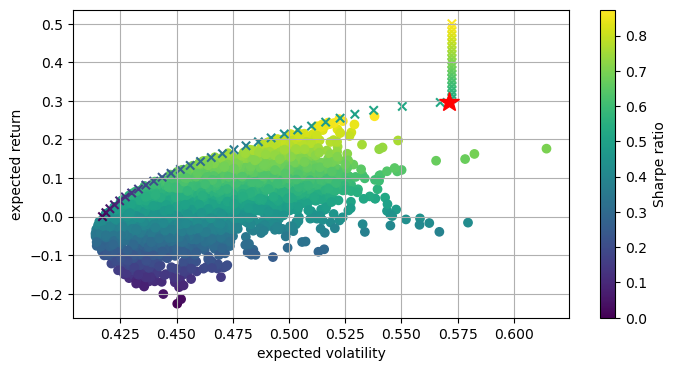

In [29]:
plt.figure(figsize = (8,4))

#圆圈：蒙特卡洛随机产生的组合分布

plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')

#叉号：有效前沿



#红星：标记最高sharpe组合

plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)

#黄星：标记最小方差组合

# plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)

plt.grid(True)

plt.xlabel('expected volatility')

plt.ylabel('expected return')

plt.colorbar(label = 'Sharpe ratio')